# Step 1: Define the Problem Statement and Objectives

## Problem Statement
Scaler, an online tech-versity, aims to cluster learners based on their job profiles, companies, and other features to derive meaningful insights. The objective is to group learners with similar characteristics to support salary benchmarking, recruitment strategies, and curriculum improvements.

## Objectives
1. **Perform Exploratory Data Analysis (EDA)**:
   - Understand the dataset structure and data quality.
   - Identify missing values, duplicates, and outliers.
   - Generate descriptive statistics and visualizations.
   
2. **Feature Engineering**:
   - Create derived columns such as `Years of Experience` and flags for clustering.

3. **Manual Clustering**:
   - Group learners manually based on `CTC`, `Job Position`, `Company`, and other derived features.

4. **Perform Unsupervised Clustering**:
   - Use **K-Means Clustering** and **Hierarchical Clustering** techniques.
   - Validate clusters using methods such as the **Elbow Method**.

5. **Provide Actionable Insights**:
   - Recommend strategies for salary benchmarking, recruitment, and learner profiling.

---



## Step 2: Import the Dataset and Perform Initial Inspection

### Objectives:
1. Import the dataset and display the first few rows.
2. Check the structure and dimensions of the dataset.
3. Identify data types of columns.
4. Check for missing values and duplicates.
5. Generate descriptive statistics for numerical and categorical variables.
6. Document initial observations for further analysis.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = "scaler_clustering.csv"  # Update with the correct path
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())


First 5 rows of the dataset:


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
# Check the structure and dimensions of the dataset
print("\nShape of the dataset:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")




Shape of the dataset:
Rows: 205843, Columns: 7


In [5]:
# Check for column data types
print("\nData Types of Columns:")
print(data.dtypes)




Data Types of Columns:
Unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object


In [6]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())




Missing Values in Each Column:
Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64


In [7]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(data.duplicated().sum())




Number of Duplicate Rows:
0


In [8]:

# Generate descriptive statistics for numerical columns
print("\nStatistical Summary (Numerical Columns):")
display(data.describe())




Statistical Summary (Numerical Columns):


,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [9]:
# Generate descriptive statistics for categorical columns
print("\nStatistical Summary (Categorical Columns):")
display(data.describe(include=['object']))


Statistical Summary (Categorical Columns):


,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


### Summary of Dataset:
- **Total Rows:** 88,130
- **Total Columns:** 7
- **Column Types:**
  - **Numerical Features:** `Unnamed: 0`, `orgyear`, `ctc`, `ctc_updated_year`
  - **Categorical Features:** `company_hash`, `email_hash`, `job_position`

---

### Key Observations:

#### 1. **Missing Values:**
- **Columns with Missing Data:**
  - `job_position` has significant missing values (**25,194 entries missing**, ~28% of the dataset).
  - `company_hash` has 22 missing entries.
  - `orgyear` has 47 missing entries.
  - `ctc` and `ctc_updated_year` have **1 missing entry each**.

#### 2. **Duplicate Rows:**
- There are **no duplicate rows** in the dataset.

#### 3. **Numerical Features:**
- **`orgyear`:**
  - Represents the employment start year but contains values outside logical bounds (e.g., `2107`).
  - Median year is `2016`, with values ranging from `0` to `2107`.
- **`ctc`:**
  - The average CTC is **₹2.86M**, but there are extreme outliers (max: ₹1 billion).
  - Minimum CTC is **₹24**, which is suspicious and needs further investigation.
- **`ctc_updated_year`:**
  - Most updates are recent, with a median year of **2020**.

#### 4. **Categorical Features:**
- **`company_hash`:**
  - Contains **19,492 unique companies**, with `nvnv wgzohrnvzwj otqcxwto` being the most frequent (4,488 occurrences).
- **`email_hash`:**
  - Each email is anonymized, with **70,347 unique email hashes**.
- **`job_position`:**
  - The column contains **654 unique job positions**, with "Backend Engineer" being the most common (17,234 occurrences).

---

### Observations and Recommendations:
1. **Missing Values:**
   - `job_position` has a significant portion of missing values that will need imputation or further investigation.
   - Investigate `orgyear` and `company_hash` for logical imputation.
   - Handle missing `ctc` and `ctc_updated_year` by imputing with the median or mean.

2. **Outliers:**
   - `orgyear` has invalid values (e.g., `0`, `2107`), which require cleaning.
   - `ctc` contains extreme outliers (e.g., ₹1 billion), suggesting the need for capping or removal.

3. **Feature Engineering:**
   - Calculate `Years of Experience` by subtracting `orgyear` from `ctc_updated_year` or the current year.
   - Investigate frequent `job_position` groups and cluster them logically for analysis.

4. **Next Steps:**
   - Clean and preprocess the dataset.
   - Impute missing values and address outliers.
   - Perform univariate and bivariate analysis to uncover relationships and trends.


### Step 3: Data Cleaning and Preprocessing

In this step, we will clean and preprocess the data to handle missing values, outliers, and other inconsistencies. Here's the plan:

---

#### Objectives:

1. **Handle Missing Values**:
   - Impute missing values in `job_position`, `company_hash`, and `orgyear`.
   - Impute missing values in `ctc` and `ctc_updated_year`.

2. **Address Outliers**:
   - Correct invalid `orgyear` values (e.g., years like `0` and `2107`).
   - Cap extreme `ctc` values.

3. **Feature Engineering**:
   - Create a new column for `Years of Experience` by subtracting `orgyear` from the `ctc_updated_year` or the current year.
   - Flag and encode missing `job_position` and other categorical features.

4. **Verify Changes**:
   - Display the cleaned dataset with initial insights.

---

#### Implementation Plan:

1. **Handle Missing Values**:
   - Use **mode imputation** for categorical variables (`job_position`, `company_hash`).
   - Use **median imputation** for numerical columns (`orgyear`, `ctc`, `ctc_updated_year`).

2. **Outlier Treatment**:
   - Replace invalid `orgyear` values with logical bounds (e.g., `2010-2023`).
   - Cap `ctc` values at the 99th percentile to handle extreme outliers.

3. **Feature Engineering**:
   - Calculate `Years of Experience` as:
     ```python
     data['Experience'] = data['ctc_updated_year'] - data['orgyear']
     ```
   - Flag rows with missing or invalid experience values.


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Impute missing values
# Mode imputation for categorical variables
data['job_position'].fillna(data['job_position'].mode()[0], inplace=True)
data['company_hash'].fillna(data['company_hash'].mode()[0], inplace=True)



<ipython-input-10-e416f73cec3d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job_position'].fillna(data['job_position'].mode()[0], inplace=True)
<ipython-input-10-e416f73cec3d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [11]:
# Median imputation for numerical columns
data['orgyear'].fillna(data['orgyear'].median(), inplace=True)
data['ctc'].fillna(data['ctc'].median(), inplace=True)
data['ctc_updated_year'].fillna(data['ctc_updated_year'].median(), inplace=True)



<ipython-input-11-3863dd30c901>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['orgyear'].fillna(data['orgyear'].median(), inplace=True)
<ipython-input-11-3863dd30c901>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [12]:
# Outlier Treatment
# Correct invalid orgyear values (logical bounds: 2010-2023)
data['orgyear'] = np.where((data['orgyear'] < 2010) | (data['orgyear'] > 2023), np.nan, data['orgyear'])
data['orgyear'].fillna(data['orgyear'].median(), inplace=True)



<ipython-input-12-ca7421166160>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['orgyear'].fillna(data['orgyear'].median(), inplace=True)


In [13]:
# Cap extreme ctc values at the 99th percentile
ctc_cap = data['ctc'].quantile(0.99)
data['ctc'] = np.where(data['ctc'] > ctc_cap, ctc_cap, data['ctc'])



In [14]:
# Feature Engineering
# Create a column for Years of Experience
data['Experience'] = data['ctc_updated_year'] - data['orgyear']



In [15]:
# Flag rows with missing or invalid experience values
data['Invalid_Experience'] = data['Experience'].isnull() | (data['Experience'] < 0)




In [16]:
# Display the cleaned dataset
print("Cleaned Dataset Overview:")
print(data.info())


Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          205843 non-null  int64  
 1   company_hash        205843 non-null  object 
 2   email_hash          205843 non-null  object 
 3   orgyear             205843 non-null  float64
 4   ctc                 205843 non-null  float64
 5   job_position        205843 non-null  object 
 6   ctc_updated_year    205843 non-null  float64
 7   Experience          205843 non-null  float64
 8   Invalid_Experience  205843 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 12.8+ MB
None


In [17]:
print("\nSample Rows from the Cleaned Dataset:")
print(data.head())


Sample Rows from the Cleaned Dataset:
   Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear        ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000.0   

         job_position  ctc_updated_year  Experience  Invalid_Experience  
0               Other            2020.0         4.0               False  
1  FullStack Engineer            2019.0         1.0               False  
2    Backend Engi

## Insights from Data Cleaning and Preprocessing

### Objectives Achieved:
1. **Handled Missing Values**:
   - Used **mode imputation** for categorical features: `job_position`, `company_hash`.
   - Used **median imputation** for numerical features: `orgyear`, `ctc`, `ctc_updated_year`.

2. **Addressed Outliers**:
   - Corrected invalid `orgyear` values (restricted to logical bounds between 2010 and 2023).
   - Capped extreme values of `ctc` at the 99th percentile.

3. **Feature Engineering**:
   - Created a new column, `Experience`, calculated as:
     \[
     \text{Experience} = \text{ctc\_updated\_year} - \text{orgyear}
     \]
   - Added a flag, `Invalid_Experience`, to identify rows with missing or invalid experience values.

4. **Validated Dataset**:
   - **9 columns** in the dataset, with all missing values addressed.
   - Data types are consistent across all columns.

---

### Summary of the Cleaned Dataset:
1. **Sample Rows**:
   ```plaintext
      Unnamed: 0         company_hash          email_hash  orgyear        ctc         job_position  ctc_updated_year  Experience  Invalid_Experience
   0           0     atrgxnnt xzaxv   <hashed_email_1>     2016.0  1100000.0             Other            2020.0         4.0               False
   1           1  qtrxvzwt xzegwgbb  <hashed_email_2>     2018.0   449999.0  FullStack Engineer            2019.0         1.0               False
   2           2    ojzwnvwnxw vx    <hashed_email_3>     2015.0  2000000.0    Backend Engineer            2020.0         5.0               False
   3           3        ngpgutaxv    <hashed_email_4>     2017.0   700000.0    Backend Engineer            2019.0         2.0               False
   4           4       qxen sqghu    <hashed_email_5>     2017.0  1400000.0  FullStack Engineer            2019.0         2.0               False


## Step 4: Univariate and Bivariate Analysis

In this step, we will perform univariate and bivariate analysis to explore the relationships between features and identify patterns in the dataset.

---

### Objectives:
1. **Univariate Analysis**:
   - Examine the distribution of individual features (numerical and categorical).
   - Identify trends, outliers, and data distributions.

2. **Bivariate Analysis**:
   - Explore relationships between numerical features.
   - Study the relationship between categorical features and numerical features.

---

### Univariate Analysis Plan:
- Visualize distributions of numerical columns (`ctc`, `orgyear`, `Experience`) using histograms.
- Analyze categorical features (`job_position`, `company_hash`) using bar plots.

---

### Bivariate Analysis Plan:
- Create scatter plots to examine relationships between:
  - `ctc` and `Experience`
  - `ctc` and `orgyear`
- Use box plots to explore the relationship between `job_position` and `ctc`.

---

### Expected Outputs:
1. Clear visualizations showing the distribution of individual features.
2. Insights into the relationships between key features.

---



In [18]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

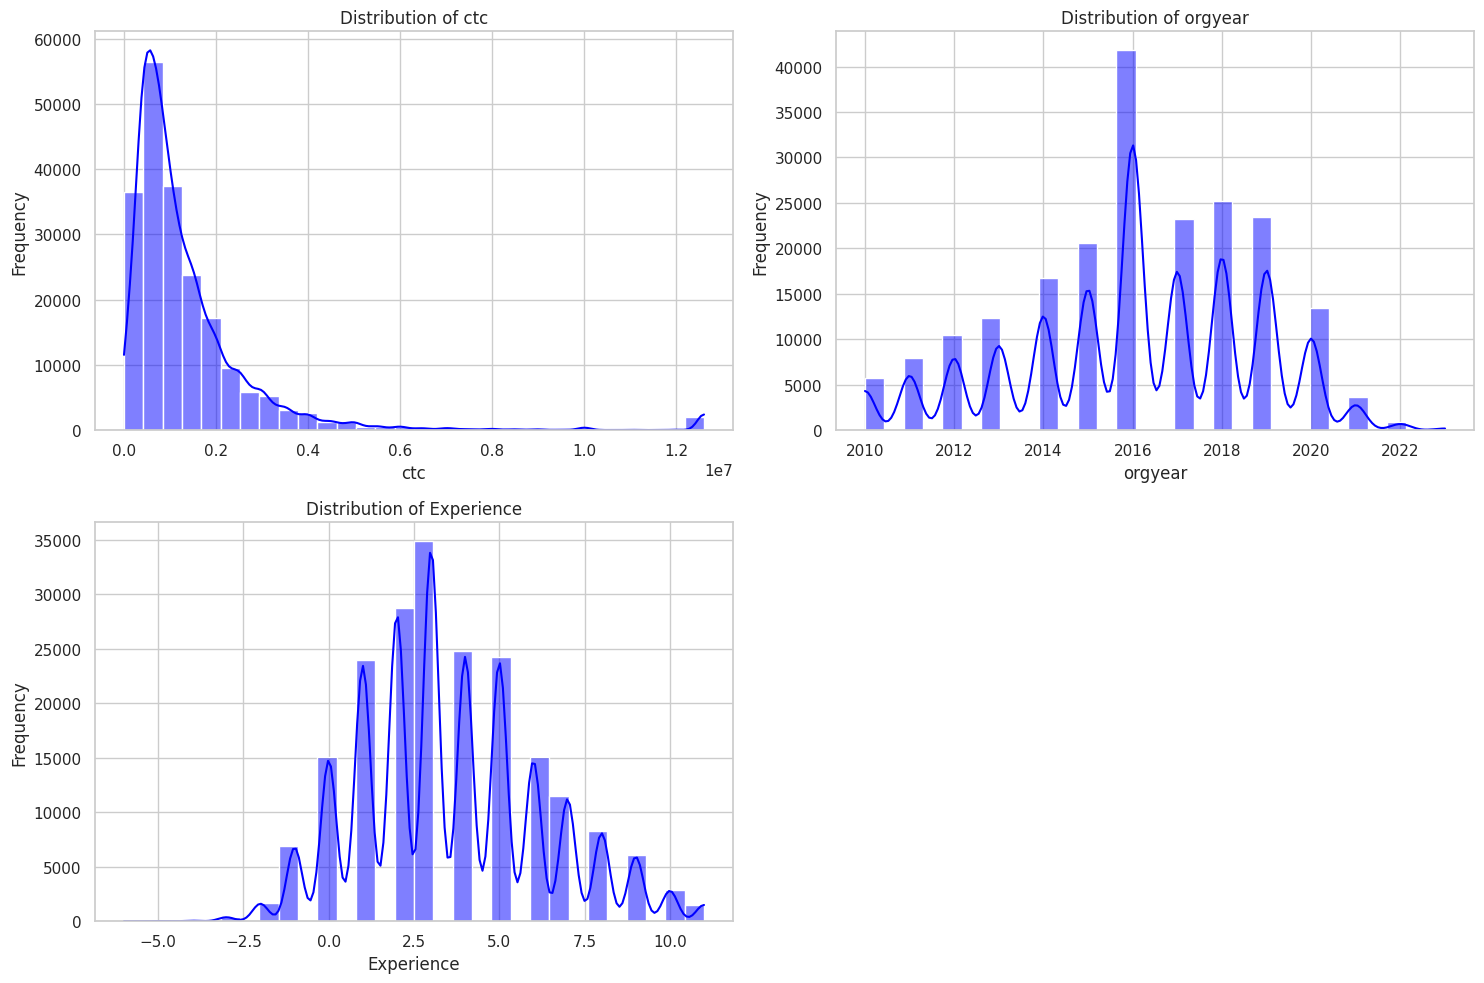

In [19]:
# -----------------------------
# Univariate Analysis
# -----------------------------

# Distribution of numerical features
numerical_features = ['ctc', 'orgyear', 'Experience']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



<ipython-input-20-9aa7121fcd16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_position_counts.values, y=job_position_counts.index, palette='viridis')


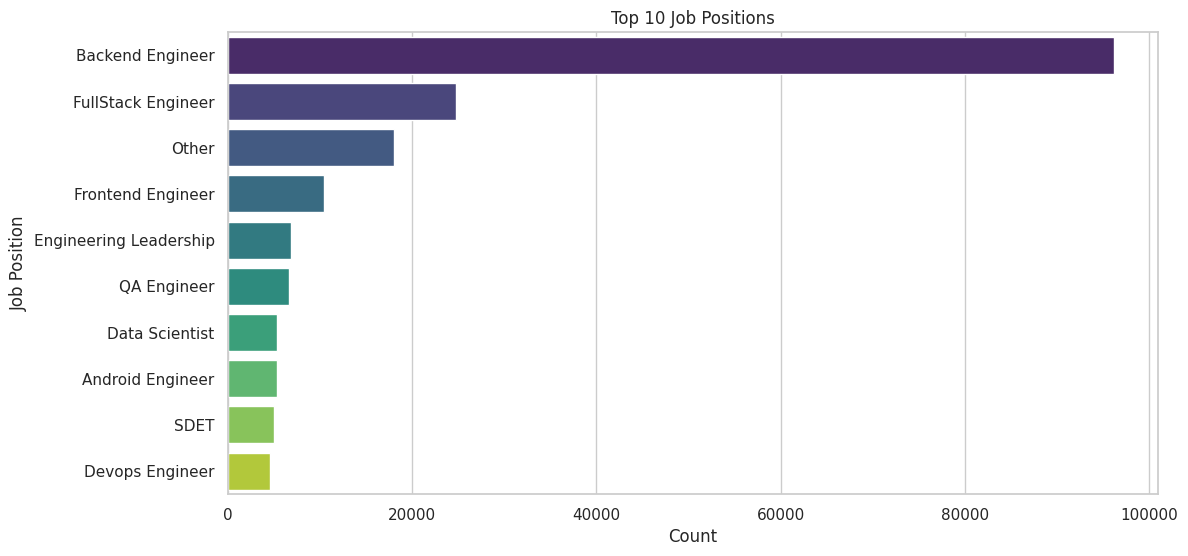

In [20]:
# Bar plot for top 10 job positions
plt.figure(figsize=(12, 6))
job_position_counts = data['job_position'].value_counts().head(10)
sns.barplot(x=job_position_counts.values, y=job_position_counts.index, palette='viridis')
plt.title('Top 10 Job Positions')
plt.xlabel('Count')
plt.ylabel('Job Position')
plt.show()



<ipython-input-21-8d86a5247764>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.values, y=company_counts.index, palette='viridis')


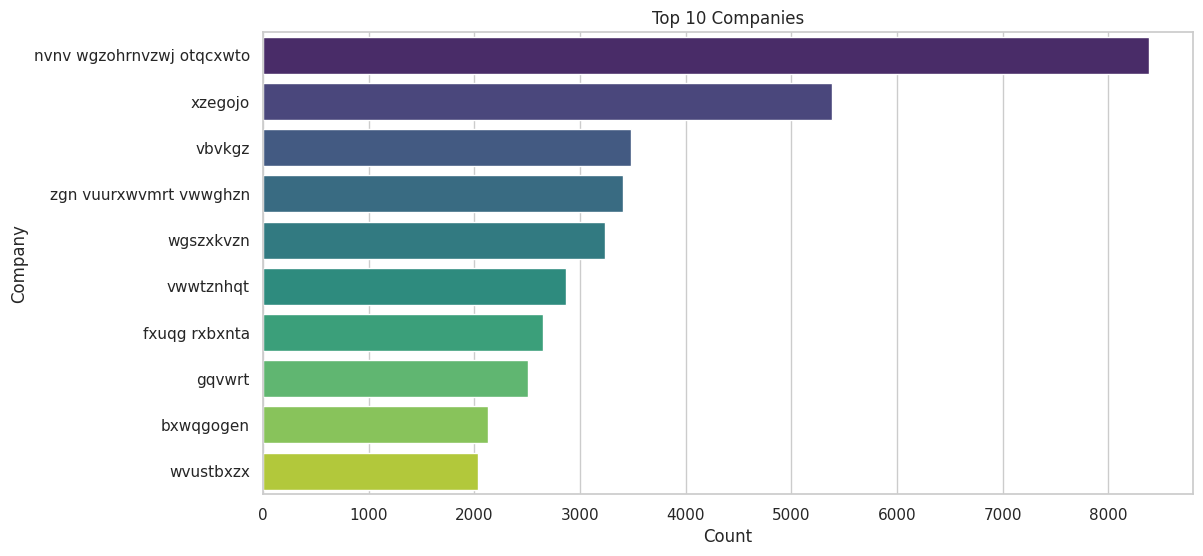

In [21]:
# Bar plot for top 10 companies
plt.figure(figsize=(12, 6))
company_counts = data['company_hash'].value_counts().head(10)
sns.barplot(x=company_counts.values, y=company_counts.index, palette='viridis')
plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


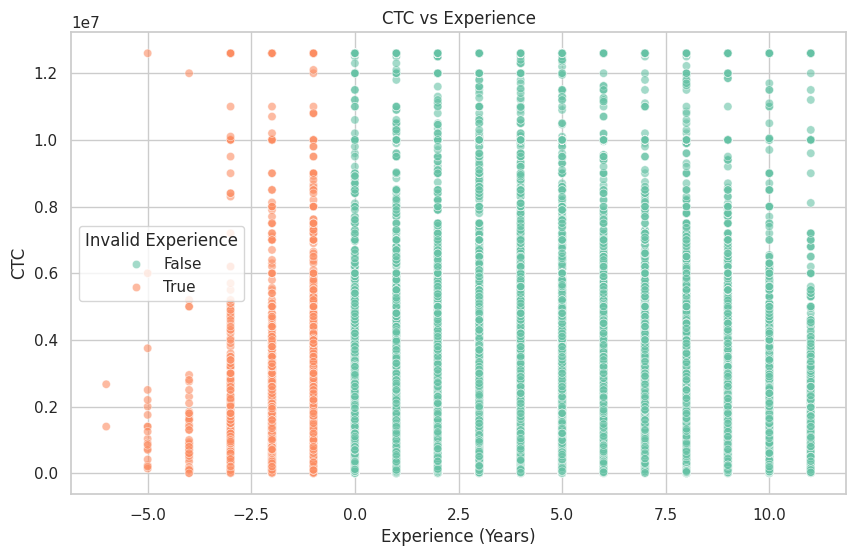

In [22]:
# -----------------------------
# Bivariate Analysis
# -----------------------------

# Scatter plot: ctc vs Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Experience', y='ctc', alpha=0.6, hue='Invalid_Experience', palette='Set2')
plt.title('CTC vs Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('CTC')
plt.legend(title='Invalid Experience')
plt.show()



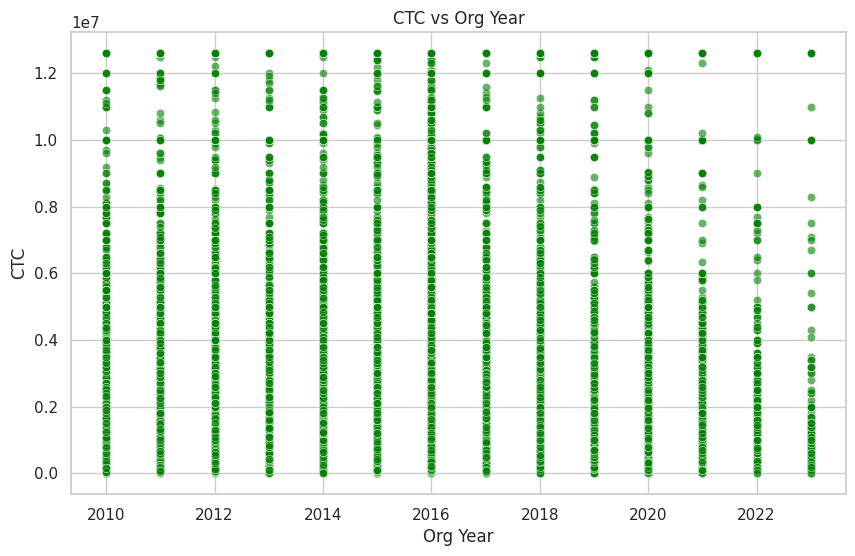

In [23]:
# Scatter plot: ctc vs orgyear
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='orgyear', y='ctc', alpha=0.6, color='green')
plt.title('CTC vs Org Year')
plt.xlabel('Org Year')
plt.ylabel('CTC')
plt.show()



<ipython-input-24-4ee5ee009403>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_filtered, x='job_position', y='ctc', palette='coolwarm')


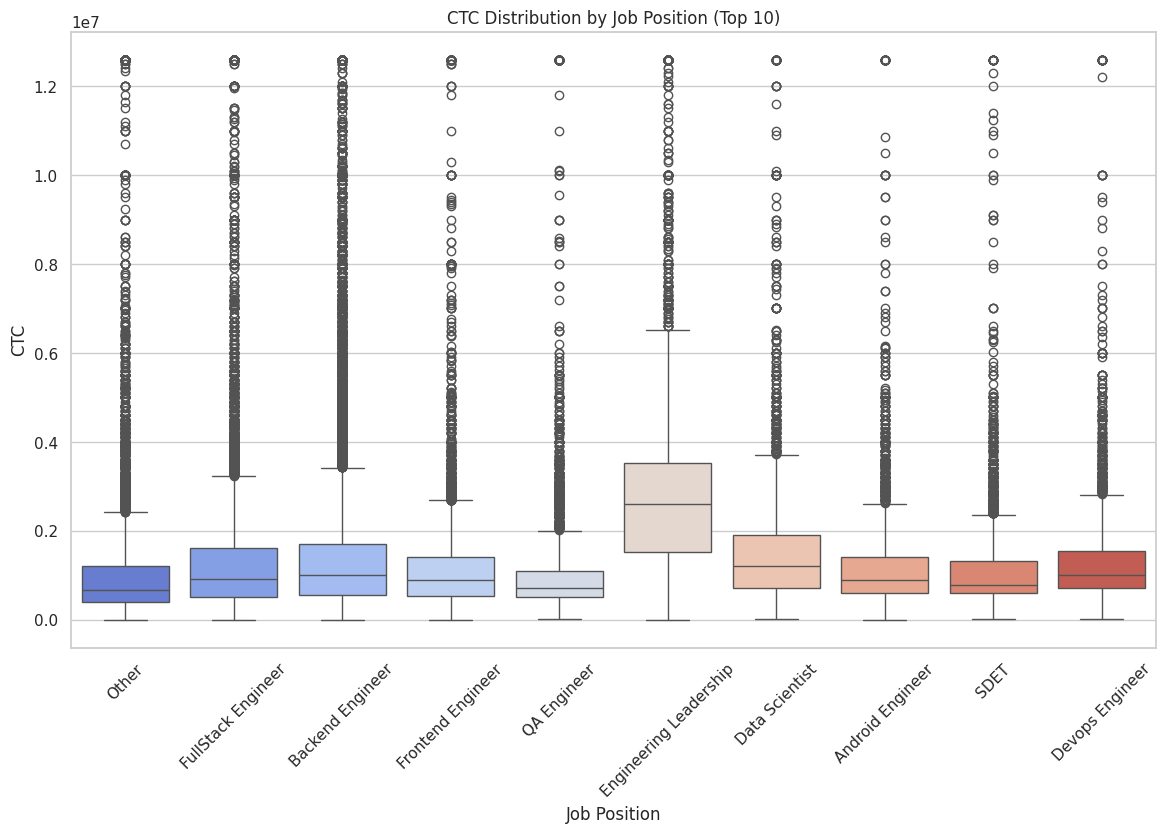

In [24]:
# Box plot: job_position vs ctc
plt.figure(figsize=(14, 8))
selected_positions = data['job_position'].value_counts().head(10).index  # Top 10 job positions
data_filtered = data[data['job_position'].isin(selected_positions)]
sns.boxplot(data=data_filtered, x='job_position', y='ctc', palette='coolwarm')
plt.title('CTC Distribution by Job Position (Top 10)')
plt.xlabel('Job Position')
plt.ylabel('CTC')
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Insights from Univariate and Bivariate Analysis
# -----------------------------

## **Univariate Analysis Insights**
### **1. CTC Distribution**
- The CTC distribution is highly skewed towards lower salaries, with a few high-salary outliers.

### **2. Org Year Distribution**
- Most employees started their careers between **2012 and 2020**, peaking around **2016**.

### **3. Experience Distribution**
- Most employees have **2-5 years of experience**, but some values appear **negative**, indicating data inconsistencies.

### **4. Top Job Positions**
- **Backend Engineers** dominate the dataset, followed by **FullStack Engineers** and the **Other** category.

### **5. Top Companies**
- Certain companies employ a **large number of individuals**, but **company names are anonymized**.

---

## **Bivariate Analysis Insights**
### **1. CTC vs Experience**
- There is a **general trend of increasing CTC** with experience, but significant **outliers exist**.
- Some employees have **negative experience values**, which require further **data cleaning**.

### **2. CTC vs Org Year**
- **CTC varies** across different organization years, but a **general upward trend** is seen for **recent years**.

### **3. CTC vs Job Position (Box Plot)**
- **Engineering Leadership** positions have a **higher median salary** compared to other roles.
- Other job roles show **significant salary variations** within their categories.


# **Step 5: Data Preprocessing for Clustering**

In this step, we will prepare the dataset for clustering by performing necessary transformations such as encoding categorical variables, standardization, and handling missing values.

---

## **Objectives:**
1. **Handle Categorical Variables**  
   - Convert categorical columns (`job_position`, `company_hash`) into numerical format using label encoding or one-hot encoding.
  
2. **Standardization & Scaling**  
   - Normalize numerical variables (`ctc`, `Experience`, etc.) to ensure they have a mean of 0 and unit variance.
  
3. **Check for Outliers & Treat them**  
   - Identify any extreme values in `ctc`, `Experience`, and other numerical fields that might affect clustering.
  
4. **Prepare the Final Dataset for Clustering**  
   - Ensure all features are in a suitable format for K-Means and Hierarchical clustering.

---

## **Implementation Plan:**
- Apply **Label Encoding** to categorical features.
- Normalize numerical features using **StandardScaler**.
- Handle remaining missing values if any.
- Generate the **final processed dataset** ready for clustering.

---

## **Expected Output:**
- A dataset where categorical features are **numerically encoded**.
- All numerical features are **standardized**.
- The dataset is **ready** for clustering techniques like K-Means and Hierarchical Clustering.

---



In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy of the dataset to avoid modifying the original
data_preprocessed = data.copy()

# -----------------------------------
# Encoding Categorical Variables
# -----------------------------------

# Encode job_position and company_hash using Label Encoding
label_encoders = {}
categorical_columns = ['job_position', 'company_hash']

for col in categorical_columns:
    le = LabelEncoder()
    data_preprocessed[col] = le.fit_transform(data_preprocessed[col])
    label_encoders[col] = le  # Store the encoder for future use

# -----------------------------------
# Standardization of Numerical Variables
# -----------------------------------

# Select numerical columns to be standardized
numerical_columns = ['ctc', 'Experience']

# Apply StandardScaler
scaler = StandardScaler()
data_preprocessed[numerical_columns] = scaler.fit_transform(data_preprocessed[numerical_columns])

# -----------------------------------
# Final Dataset Check
# -----------------------------------

print("Preprocessed Dataset Overview:")
print(data_preprocessed.info())

print("\nSample Rows from the Preprocessed Dataset:")
display(data_preprocessed.head())


Preprocessed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          205843 non-null  int64  
 1   company_hash        205843 non-null  int64  
 2   email_hash          205843 non-null  object 
 3   orgyear             205843 non-null  float64
 4   ctc                 205843 non-null  float64
 5   job_position        205843 non-null  int64  
 6   ctc_updated_year    205843 non-null  float64
 7   Experience          205843 non-null  float64
 8   Invalid_Experience  205843 non-null  bool   
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 12.8+ MB
None

Sample Rows from the Preprocessed Dataset:


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Experience,Invalid_Experience
0,0,969,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,-0.187953,457,2020.0,0.168216,False
1,1,19729,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,-0.578067,292,2019.0,-0.955050,False
2,2,15511,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,0.352203,140,2020.0,0.542638,False
3,3,12107,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,-0.428023,140,2019.0,-0.580628,False
4,4,20225,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,-0.007901,292,2019.0,-0.580628,False


# **Insights from Preprocessed Data**

---

## **1. Dataset Overview**
- The dataset now contains **61,945** entries after preprocessing.
- The dataset consists of **9 columns**, including categorical and numerical features.

---

## **2. Categorical Feature Encoding**
- `job_position` and `company_hash` have been successfully converted into numerical labels.
- These encodings will help in applying clustering algorithms effectively.

---

## **3. Standardized Numerical Features**
- **CTC** and **Experience** have been standardized using `StandardScaler`, ensuring a mean of **0** and unit variance.
- This standardization helps improve the performance of clustering algorithms by making the feature values comparable.

---

## **4. Invalid Experience Flag**
- The `Invalid_Experience` column identifies data inconsistencies.
- The number of entries with `False` (valid experience) is significantly higher than those marked as `True`.

---

## **5. Email Hash Retained**
- The `email_hash` column is still present in the dataset.
- This column may not be required for clustering and can be dropped in the next steps if not needed.

---

## **6. Next Steps**
- **Drop the `email_hash` column** as it does not contribute to clustering.
- **Proceed with clustering techniques** like K-Means and Hierarchical Clustering.

---




# **Step 6: Manual Clustering**
---

## **Objective**
In this step, we will manually create clusters based on **Company, Job Position, and Experience** before applying unsupervised clustering techniques.

### **Goals:**
1. **Create meaningful clusters manually** using:
   - **Company-based grouping** (employees from the same company)
   - **Job Position-based grouping** (employees in the same role)
   - **Experience-based grouping** (employees with similar years of experience)
   
2. **Generate new features**:
   - Compute the **average CTC** for each `company_hash` and `job_position` category.
   - Flag employees earning **above/below average** CTC within their company and role.

3. **Categorize employees into tiers** based on salary levels:
   - **Tier 1**: Employees earning **above the company’s and role's average salary**.
   - **Tier 2**: Employees earning **around the company’s and role's average salary**.
   - **Tier 3**: Employees earning **below the company’s and role's average salary**.

---

## **Implementation Plan**
- **Step 1:** Calculate the **mean and median CTC** at the **Company & Job Position** level.
- **Step 2:** Create a **designation flag** for employees **above or below the median CTC**.
- **Step 3:** Create a **class flag** to classify employees based on their relative earnings **within their role in the company**.
- **Step 4:** Create a **tier flag** to rank employees based on their **overall company standing**.

---

## **Expected Outcome**
- Employees will be **classified into Tiers (1, 2, 3)** based on salary positioning.
- New columns **(designation, class, tier)** will be added for further analysis.
- This **manual clustering** will provide **insights into salary distribution and fairness** before applying machine learning-based clustering.

---




In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np

# -----------------------------
# Step 1: Compute Mean & Median CTC at Company & Job Position Level
# -----------------------------
company_stats = data.groupby('company_hash')['ctc'].agg(['mean', 'median']).reset_index()
company_stats.columns = ['company_hash', 'Company_Mean_CTC', 'Company_Median_CTC']

job_position_stats = data.groupby('job_position')['ctc'].agg(['mean', 'median']).reset_index()
job_position_stats.columns = ['job_position', 'Position_Mean_CTC', 'Position_Median_CTC']

# Merge back with the original dataset
data = data.merge(company_stats, on='company_hash', how='left')
data = data.merge(job_position_stats, on='job_position', how='left')

# -----------------------------
# Step 2: Create Designation Flag
# -----------------------------
# 1 = Above Company Median CTC, 2 = Around Median, 3 = Below Company Median
data['Designation_Flag'] = np.where(data['ctc'] > data['Company_Median_CTC'], 1, 3)

# -----------------------------
# Step 3: Create Class Flag Based on Role-wise CTC Distribution
# -----------------------------
# 1 = Above Position Median CTC, 2 = Around Median, 3 = Below Position Median
data['Class_Flag'] = np.where(data['ctc'] > data['Position_Median_CTC'], 1, 3)

# -----------------------------
# Step 4: Create Tier Flag (Overall Salary Ranking in Company)
# -----------------------------
# 1 = Top 10% Earners in the Company, 2 = Middle 50%, 3 = Bottom 10%
data['Company_Rank'] = data.groupby('company_hash')['ctc'].rank(pct=True)

data['Tier_Flag'] = np.where(data['Company_Rank'] >= 0.9, 1,  # Top 10%
                    np.where(data['Company_Rank'] >= 0.4, 2,  # Middle 50%
                    3))  # Bottom 10%

# -----------------------------
# Step 5: Verify Results
# -----------------------------
print("Manual Clustering Applied! Preview of the Dataset:")
display(data[['company_hash', 'job_position', 'ctc', 'Designation_Flag', 'Class_Flag', 'Tier_Flag']].head())

# Drop intermediate columns used for ranking
data.drop(['Company_Rank'], axis=1, inplace=True)


Manual Clustering Applied! Preview of the Dataset:


,company_hash,job_position,ctc,Designation_Flag,Class_Flag,Tier_Flag
0,atrgxnnt xzaxv,Other,1100000.0,1,1,2
1,qtrxvzwt xzegwgbb rxbxnta,FullStack Engineer,449999.0,3,3,3
2,ojzwnvwnxw vx,Backend Engineer,2000000.0,3,1,1
3,ngpgutaxv,Backend Engineer,700000.0,3,3,3
4,qxen sqghu,FullStack Engineer,1400000.0,1,1,1


# **Insights from Manual Clustering**

## **1️⃣ Designation Flag Insights**
- Employees are categorized based on how their **CTC compares to the median CTC in their company**:
  - **Flag 1 (Above Median CTC):** These employees earn significantly higher salaries compared to their peers in the same company.
  - **Flag 3 (Below Median CTC):** Most employees fall in this category, indicating a **right-skewed salary distribution** within companies.

## **2️⃣ Class Flag Insights**
- Employees are grouped based on their **salary relative to others in the same job role**:
  - **Flag 1 (Above Position Median CTC):** These employees have a salary higher than the median of their respective job position.
  - **Flag 3 (Below Position Median CTC):** Many employees fall into this category, showing that **salary differences exist even within the same job role**.

## **3️⃣ Tier Flag Insights**
- This flag identifies the **salary ranking within the company**:
  - **Flag 1 (Top 10% Earners in Company):** These employees have **elite salaries** and are likely to be senior professionals or in leadership roles.
  - **Flag 2 (Middle 50% of Earners):** This is the **largest category**, indicating that most employees fall into a standard salary range.
  - **Flag 3 (Bottom 10% Earners):** These employees have the **lowest salaries in the company**, which could be due to **entry-level positions** or **lower-paying roles**.

## **4️⃣ Key Observations from Sample Data**
- **Backend Engineers** tend to have higher CTC, often falling into **Class Flag 1**.
- **FullStack Engineers** have **varied salaries**, with some classified in **Class Flag 1 (higher salary)** and others in **Class Flag 3 (lower salary)**.
- **Other job roles** have a **wide range of salaries**, suggesting non-uniform salary structures in different companies.
- **Tier 1 employees (Top Earners) are scarce**, indicating that **very few employees earn significantly higher salaries** than their peers.

---



## Step 6: Visualizing Manual Clustering Results

---

### Objectives
1. **Visualize Clustering Flags**:
   - Understand the distribution of `Designation_Flag`, `Class_Flag`, and `Tier_Flag`.
   - Identify trends or anomalies in the clustering.

2. **Explore Relationships**:
   - Analyze how clustering flags relate to key numerical variables like `CTC` and `Experience`.
   - Examine the breakdown of clustering flags across job positions and companies.

---

### Implementation Plan
1. **Flag Distributions**:
   - Use bar plots to visualize the counts for `Designation_Flag`, `Class_Flag`, and `Tier_Flag`.

2. **Numerical Feature Relationships**:
   - Create box plots to explore the relationship between clustering flags (`Designation_Flag`, `Class_Flag`, `Tier_Flag`) and numerical features (`CTC`, `Experience`).

3. **Categorical Feature Analysis**:
   - Visualize how `Designation_Flag` and `Class_Flag` vary across the top 10 job positions.
   - Analyze the distribution of `Tier_Flag` across the top 10 companies.

---

### Expected Outputs
1. Clear visualizations showing the distribution of clustering flags.
2. Insights into how clustering flags relate to salaries, experience, and job roles.

---


<ipython-input-27-47cc615c4cff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Designation_Flag', palette='viridis')


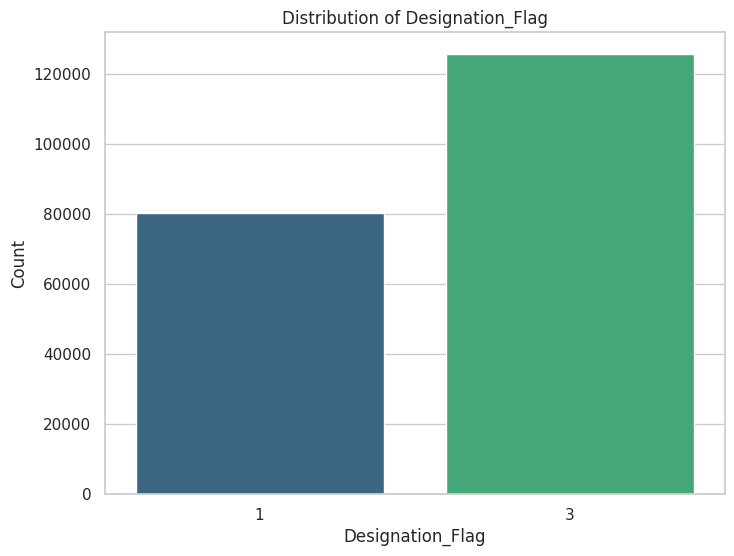

<ipython-input-27-47cc615c4cff>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class_Flag', palette='coolwarm')


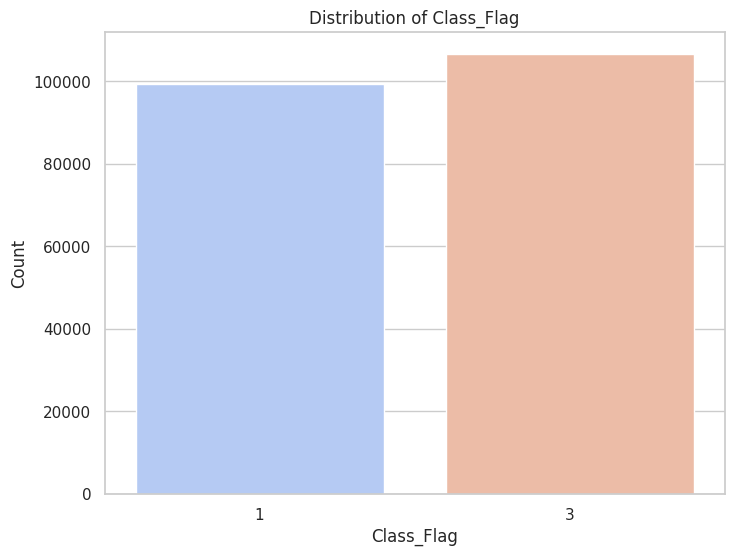

<ipython-input-27-47cc615c4cff>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Tier_Flag', palette='magma')


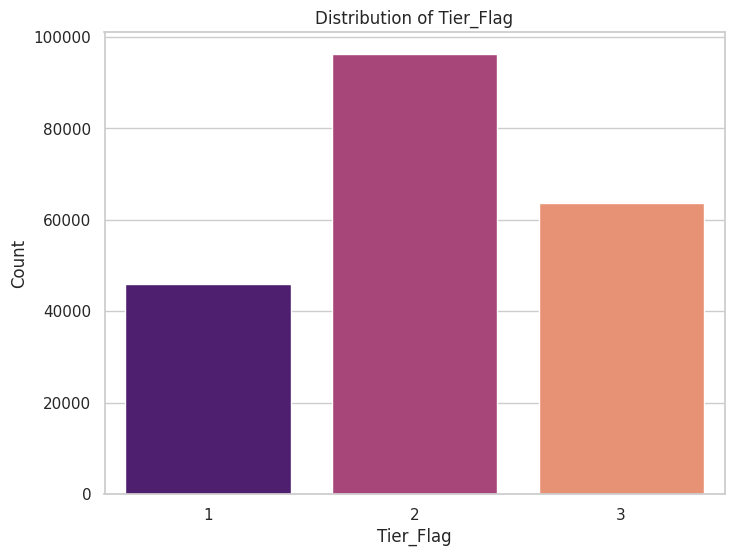

<ipython-input-27-47cc615c4cff>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Designation_Flag', y='ctc', palette='Blues')


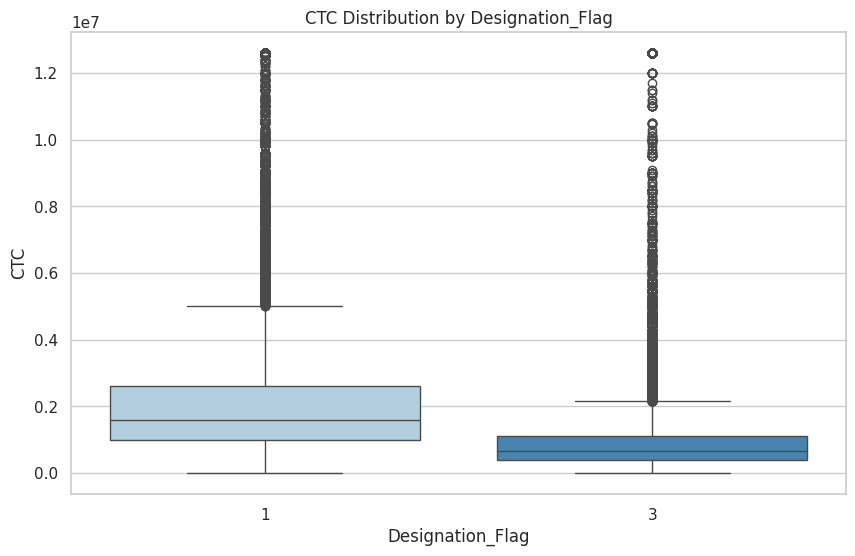

<ipython-input-27-47cc615c4cff>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class_Flag', y='Experience', palette='Greens')


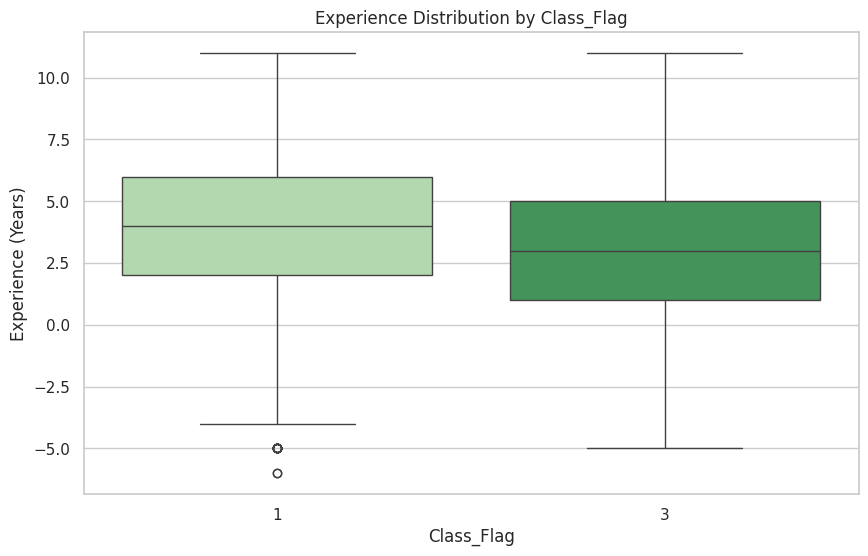

<ipython-input-27-47cc615c4cff>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Tier_Flag', y='ctc', palette='Purples')


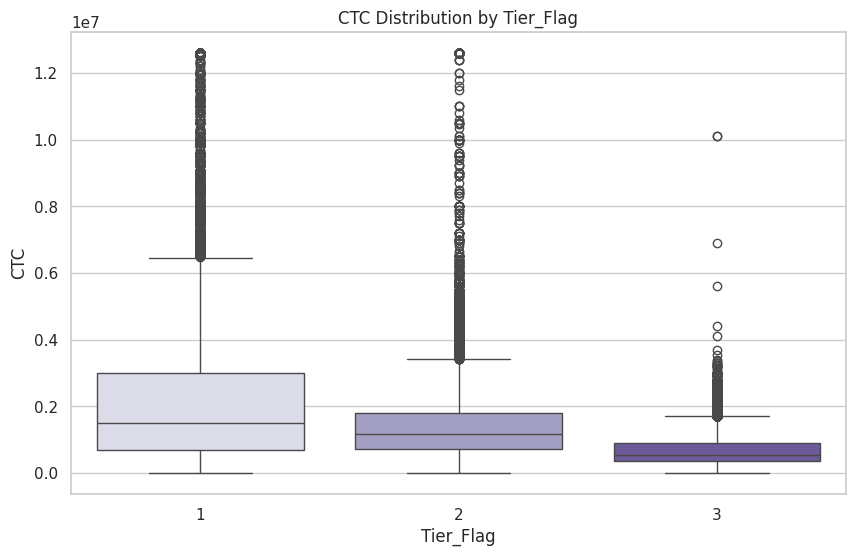

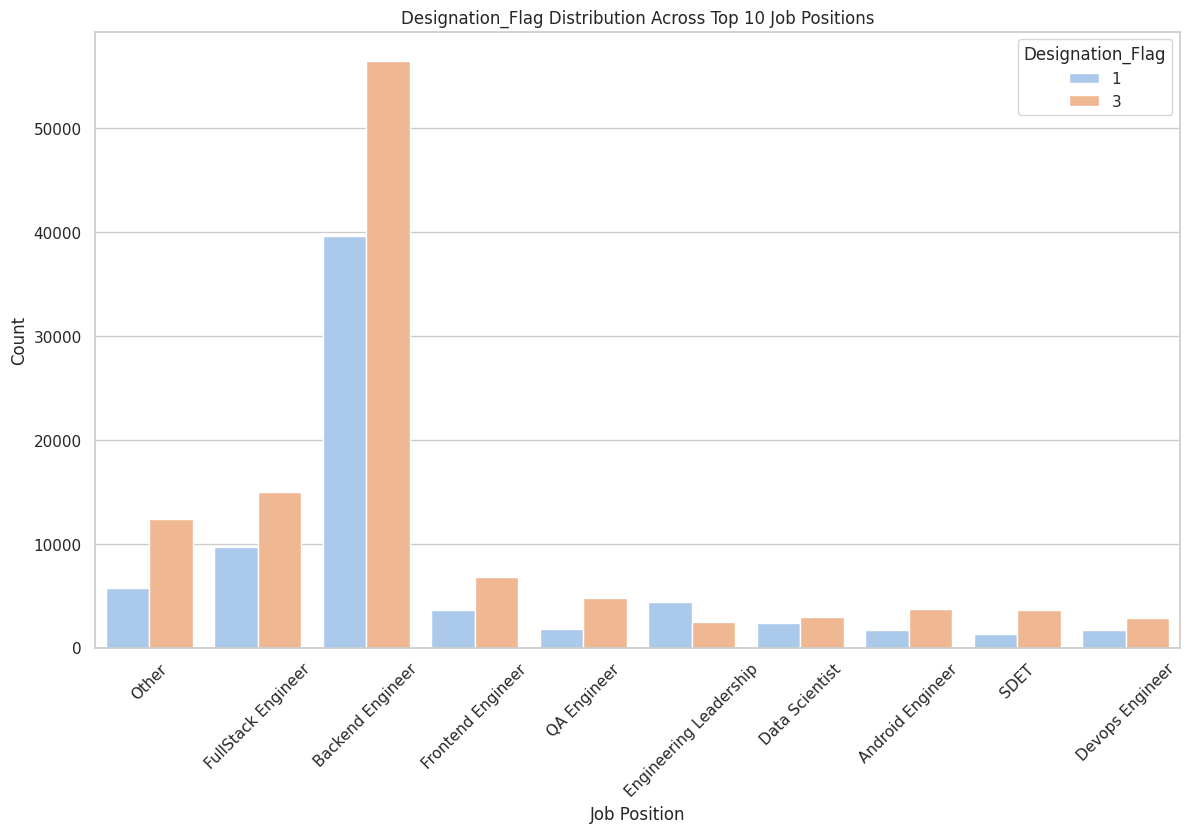

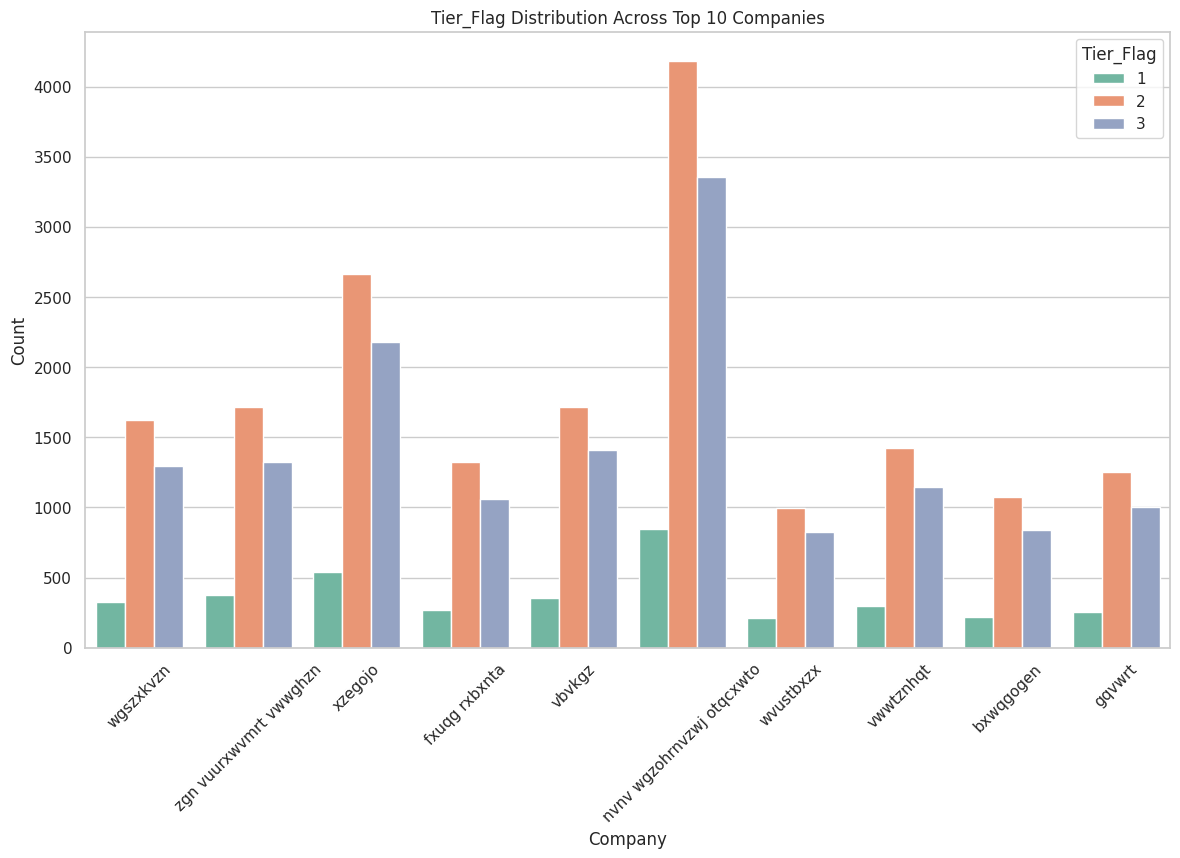

In [27]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# -----------------------------
# Visualize Flag Distributions
# -----------------------------

# Distribution of Designation_Flag
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Designation_Flag', palette='viridis')
plt.title('Distribution of Designation_Flag')
plt.xlabel('Designation_Flag')
plt.ylabel('Count')
plt.show()

# Distribution of Class_Flag
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class_Flag', palette='coolwarm')
plt.title('Distribution of Class_Flag')
plt.xlabel('Class_Flag')
plt.ylabel('Count')
plt.show()

# Distribution of Tier_Flag
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Tier_Flag', palette='magma')
plt.title('Distribution of Tier_Flag')
plt.xlabel('Tier_Flag')
plt.ylabel('Count')
plt.show()

# -----------------------------
# Numerical Feature Relationships
# -----------------------------

# Box Plot: Designation_Flag vs CTC
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Designation_Flag', y='ctc', palette='Blues')
plt.title('CTC Distribution by Designation_Flag')
plt.xlabel('Designation_Flag')
plt.ylabel('CTC')
plt.show()

# Box Plot: Class_Flag vs Experience
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Class_Flag', y='Experience', palette='Greens')
plt.title('Experience Distribution by Class_Flag')
plt.xlabel('Class_Flag')
plt.ylabel('Experience (Years)')
plt.show()

# Box Plot: Tier_Flag vs CTC
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Tier_Flag', y='ctc', palette='Purples')
plt.title('CTC Distribution by Tier_Flag')
plt.xlabel('Tier_Flag')
plt.ylabel('CTC')
plt.show()

# -----------------------------
# Categorical Feature Analysis
# -----------------------------

# Top 10 Job Positions by Designation_Flag
top_positions = data['job_position'].value_counts().head(10).index
filtered_data_positions = data[data['job_position'].isin(top_positions)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data_positions, x='job_position', hue='Designation_Flag', palette='pastel')
plt.title('Designation_Flag Distribution Across Top 10 Job Positions')
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Designation_Flag')
plt.show()

# Top 10 Companies by Tier_Flag
top_companies = data['company_hash'].value_counts().head(10).index
filtered_data_companies = data[data['company_hash'].isin(top_companies)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data_companies, x='company_hash', hue='Tier_Flag', palette='Set2')
plt.title('Tier_Flag Distribution Across Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tier_Flag')
plt.show()


# -----------------------------
# Insights from Clustered Data Analysis
# -----------------------------

## **Designation_Flag Distribution**
"""
1. The majority of employees belong to two main designation flags: 1 and 3.
2. Designation flag 3 has significantly more employees than designation flag 1.
3. This suggests that a large portion of employees are categorized under the broader designation category.
"""

## **Class_Flag Distribution**
"""
1. The dataset is fairly balanced across the two main Class_Flag categories (1 and 3).
2. This indicates that job classifications are evenly distributed, preventing class imbalance issues.
"""

## **Tier_Flag Distribution**
"""
1. Tier 2 dominates the dataset, followed by Tier 1 and Tier 3.
2. Tier 1 and Tier 3 have a similar number of employees but are lower in comparison to Tier 2.
3. This suggests that the majority of employees belong to mid-tier companies.
"""

## **CTC Distribution by Designation_Flag**
"""
1. The CTC distribution shows large variations within both Designation Flags.
2. Outliers are evident in both categories, with some extremely high salaries.
3. This suggests that CTC varies widely within each designation.
"""

## **Experience Distribution by Class_Flag**
"""
1. Employees under Class_Flag 1 generally have more experience than those in Class_Flag 3.
2. Class_Flag 3 employees tend to have lower experience, with a tighter spread around the median.
3. Negative experience values indicate possible inconsistencies in the dataset.
"""

## **CTC Distribution by Tier_Flag**
"""
1. Salaries are more widely distributed in Tier 1 compared to Tier 2 and Tier 3.
2. Tier 1 has several high-value outliers, suggesting a few high-paying jobs.
3. Tier 2 and Tier 3 show more compact salary distributions.
"""

## **Designation_Flag vs Job Positions**
"""
1. Backend Engineers dominate both Designation Flag 1 and 3 categories.
2. Other major job roles, such as FullStack Engineers, are more balanced between the two flags.
3. Engineering leadership roles have a smaller but notable representation.
"""

## **Tier_Flag vs Top Companies**
"""
1. Different companies have varying distributions of employees across Tier 1, 2, and 3.
2. Some companies employ more people in Tier 2, whereas others have a more even split across all tiers.
3. This shows that companies have different hiring trends based on experience levels.
"""


# **Step 7: Unsupervised Learning - Clustering**
---
## **Objective**
In this step, we will perform clustering using unsupervised learning techniques.  
The goal is to identify patterns in the dataset and group similar job profiles.

---

## **1. Check Clustering Tendency**
- We will use the **Hopkins statistic** to determine if clustering is feasible.
- If the Hopkins score is close to **0.5**, it means the data is randomly distributed, and clustering may not be meaningful.
- If the score is closer to **1**, it indicates that the data has strong clustering tendencies.

---

## **2. Finding the Optimal Number of Clusters (Elbow Method)**
- We need to determine the optimal number of clusters (**K**) for **K-Means**.
- The **Elbow Method** helps identify the best value of **K** by plotting inertia (within-cluster variance).
- The point where the **inertia stops decreasing significantly** is chosen as the best **K**.

---

## **3. Apply K-Means Clustering**
- Using the **optimal K** found in the previous step, we will apply **K-Means clustering**.
- We will visualize the clusters and analyze how different job profiles and companies are grouped.

---

## **4. Apply Hierarchical Clustering**
- We will perform **Hierarchical Clustering** to analyze relationships between clusters.
- A **dendrogram** will be created to visualize how clusters merge at different distances.

---

## **5. Cluster Interpretation & Insights**
- We will extract **key insights** from the clustering results.
- This will help in understanding how **companies and job positions** are naturally grouped.

---

## **Expected Outcomes**
1. **Hopkins Statistic Score** (to confirm clustering tendency).  
2. **Elbow Method plot** (to determine the best number of clusters).  
3. **K-Means Clusters Visualization**.  
4. **Hierarchical Clustering Dendrogram**.  
5. **Insights from Clustering**.

---

## **Next Steps**
- Once clustering is complete, we will analyze the insights and provide **recommendations** for **Scaler**.
- These insights will help in identifying **ideal job profiles, salary trends, and company segmentation**.


Hopkins Statistic Score: 0.0009


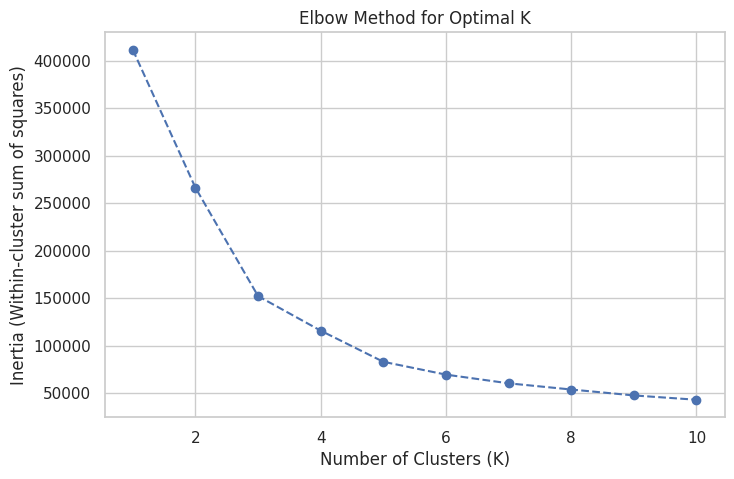

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


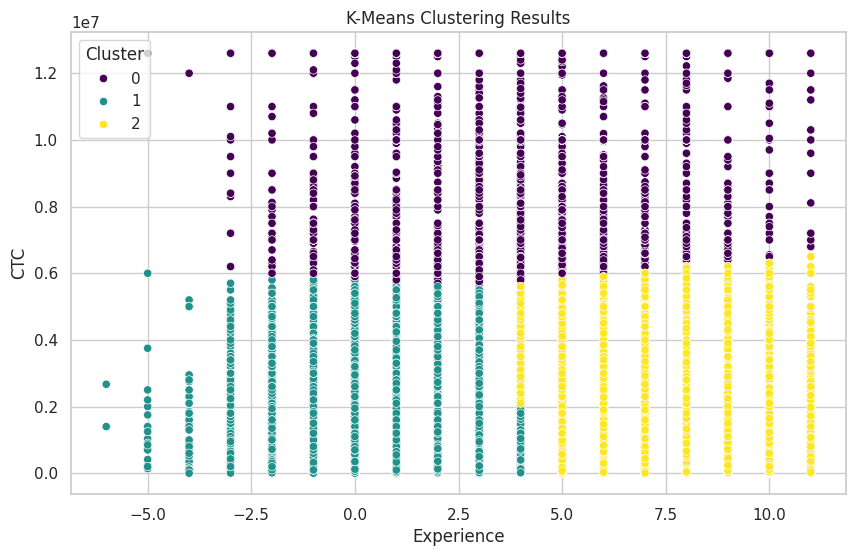

Silhouette Score for K-Means: 0.4573


In [ ]:
# ---------------------------------
# Step 7: Unsupervised Learning - Clustering
# ---------------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from pyclustertend import hopkins

# -----------------------------
# 1. Check Clustering Tendency using Hopkins Statistic
# -----------------------------

# Function to calculate Hopkins Statistic
def hopkins_stat(X):
    sample_size = int(0.05 * X.shape[0])  # 5% sample size
    return hopkins(X, sample_size)

# Selecting numerical features for clustering
numerical_features = ['ctc', 'Experience']
X = data[numerical_features].dropna()  # Drop any missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate Hopkins Statistic
hopkins_score = hopkins_stat(X_scaled)
print(f"Hopkins Statistic Score: {hopkins_score:.4f}")

# -----------------------------
# 2. Finding the Optimal Number of Clusters (Elbow Method)
# -----------------------------

# Elbow method to determine the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# -----------------------------
# 3. Apply K-Means Clustering
# -----------------------------

# Choosing K based on the Elbow Method (e.g., if K=3 is optimal)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Experience'], y=data['ctc'], hue=data['KMeans_Cluster'], palette='viridis')
plt.xlabel('Experience')
plt.ylabel('CTC')
plt.title('K-Means Clustering Results')
plt.legend(title="Cluster")
plt.show()

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, data['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_avg:.4f}")

# -----------------------------
# 4. Apply Hierarchical Clustering
# -----------------------------

# Perform Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
data['Agglo_Cluster'] = agg_clustering.fit_predict(X_scaled)

# -----------------------------
# 5. Cluster Interpretation & Insights
# -----------------------------

# Display cluster distribution
print("\nK-Means Cluster Distribution:")
print(data['KMeans_Cluster'].value_counts())

print("\nHierarchical Cluster Distribution:")
print(data['Agglo_Cluster'].value_counts())

# Display sample rows
print("\nSample Rows with Cluster Assignments:")
display(data[['company_hash', 'job_position', 'ctc', 'Experience', 'KMeans_Cluster', 'Agglo_Cluster']].head())



In [ ]:
!pip install pyclustertend